In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [40]:
data=pd.read_csv("Scholarship.csv")

In [41]:
df=data.copy()

In [42]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [43]:
df.shape

(1000, 3)

C:\Users\TANISHA\AppData\Local\Temp\ipykernel_37308\2257614411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["semester_percentage"])
C:\Users\TANISHA\AppData\Local\Temp\ipykernel_37308\2257614411.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])


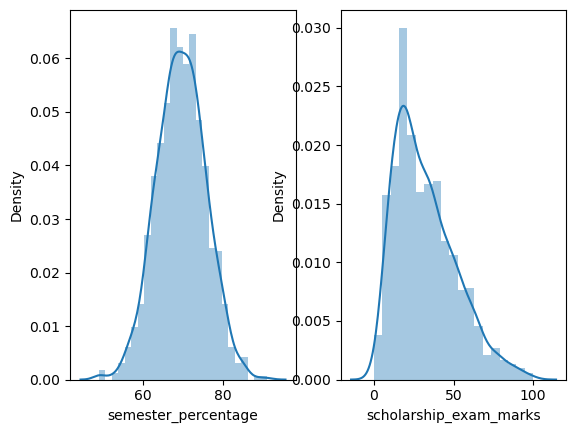

In [44]:
plt.subplot(1,2,1)
sns.distplot(df["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(df["scholarship_exam_marks"])
plt.show()


In [45]:
mean=df["semester_percentage"].mean()
std=df["semester_percentage"].std()

In [46]:
print(mean,",",std)

69.6124 , 6.158978751323897


In [47]:
Highest_allowed=mean+3*std
Lowest_allowed=mean-3*std

In [48]:
print(Highest_allowed ,",", Lowest_allowed)

88.08933625397168 , 51.13546374602831


In [49]:
df[(df["semester_percentage"]<Lowest_allowed)|(df["semester_percentage"]>Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


TRIMMING

In [50]:
df[(df["semester_percentage"]>Lowest_allowed)&(df["semester_percentage"]<Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [51]:
df["z_score"]=(df["semester_percentage"]-df["semester_percentage"].mean())/df["semester_percentage"].std()

In [52]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [53]:
df[(df["z_score"]<-3)|df["z_score"]>3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score


In [54]:
df[(df["z_score"]>-3)&(df["z_score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


CAPPING

In [55]:
upper_limit=mean+3*std
lower_limit=mean-3*std

In [56]:
df["semester_percentage"]=np.where(df["semester_percentage"]>upper_limit,upper_limit,np.where(df["semester_percentage"]<lower_limit,lower_limit,df["semester_percentage"]))

In [57]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


INTERQUARTILE RANGE

In [58]:

Q1=data["scholarship_exam_marks"].quantile(0.25)
Q3=data["scholarship_exam_marks"].quantile(0.75)

In [59]:
Q3

44.0

In [60]:
Q1

17.0

In [61]:
IQR=Q3-Q1

In [62]:
min=Q1-1.5*IQR
max=Q3+1.5*IQR

In [63]:
min

-23.5

In [64]:
max

84.5

USING TRIMMING

In [65]:
new_data=data[(data["scholarship_exam_marks"]>min)&(data["scholarship_exam_marks"]<max)]

C:\Users\TANISHA\AppData\Local\Temp\ipykernel_37308\464205569.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\TANISHA\AppData\Local\Temp\ipykernel_37308\464205569.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


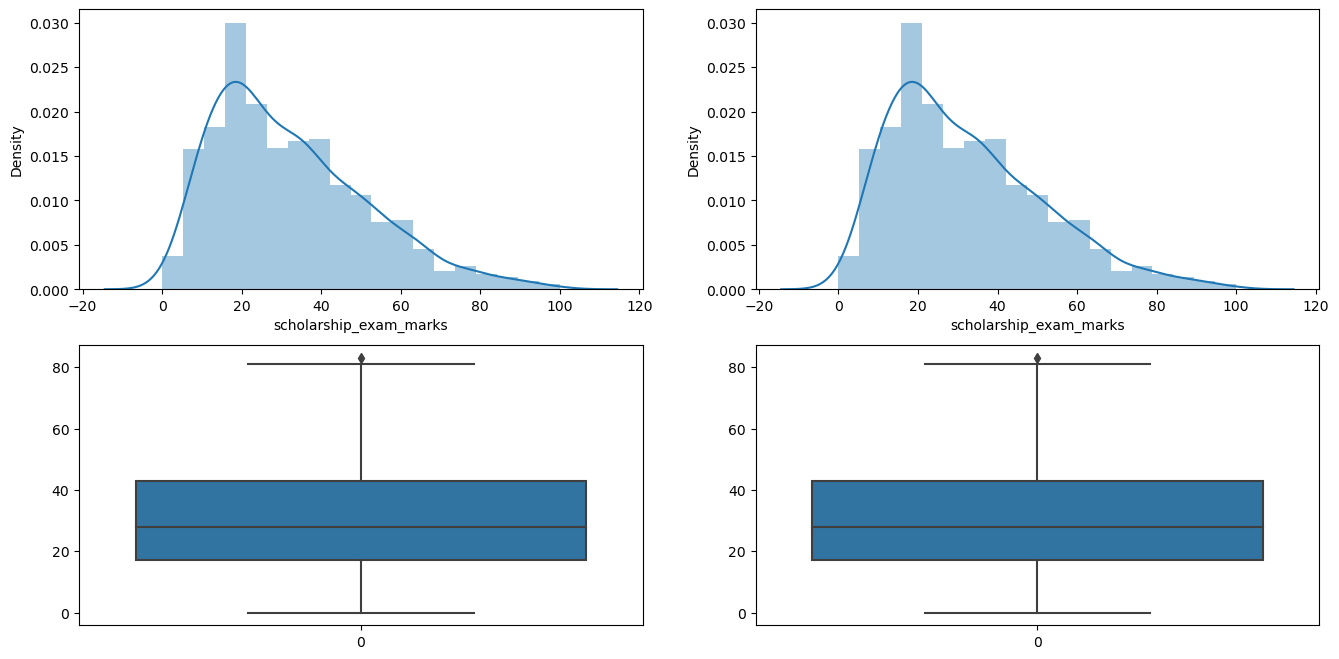

In [66]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.boxplot(new_data["scholarship_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

plt.show()

USING CAPPING


In [67]:
data["scholarship_exam_marks"]=np.where(data["scholarship_exam_marks"]>max,max,np.where(data["scholarship_exam_marks"]<min,min,data["scholarship_exam_marks"]))

<Axes: >

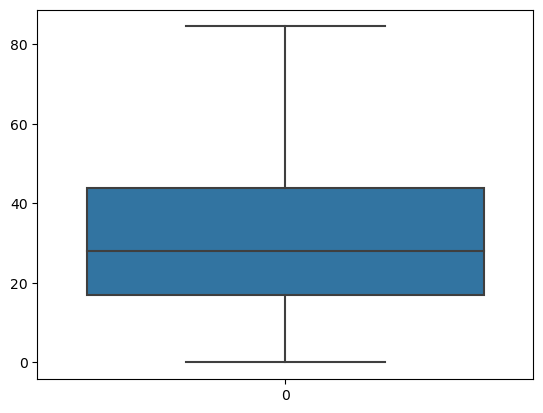

In [69]:
sns.boxplot(data["scholarship_exam_marks"])